# Churn Prediction


# Using a dataset of customer information and building a model that can predict which customers are most likely to leave a company.


Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



 Loading the Dataset

In [4]:
df=pd.read_csv(r"C:\Users\Mahavir\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#First five rows od dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Last five rows of dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1
7042,2226,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,5407,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 Number of missing values.

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
categorical_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column]=label_encoder.fit_transform(df[column])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [13]:
x=df.iloc[:,:-1].values
print(x)
y=df.iloc[:,-1].values
print(y)

[[5.3750e+03 0.0000e+00 0.0000e+00 ... 2.0000e+00 2.9850e+01 2.5050e+03]
 [3.9620e+03 1.0000e+00 0.0000e+00 ... 3.0000e+00 5.6950e+01 1.4660e+03]
 [2.5640e+03 1.0000e+00 0.0000e+00 ... 3.0000e+00 5.3850e+01 1.5700e+02]
 ...
 [3.3670e+03 0.0000e+00 0.0000e+00 ... 2.0000e+00 2.9600e+01 2.9940e+03]
 [5.9340e+03 1.0000e+00 1.0000e+00 ... 3.0000e+00 7.4400e+01 2.6600e+03]
 [2.2260e+03 1.0000e+00 0.0000e+00 ... 0.0000e+00 1.0565e+02 5.4070e+03]]
[0 0 1 ... 0 1 0]


# Split the data into Training and Testing Data

# Model Training

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [15]:
x_train

array([[6.370e+03, 0.000e+00, 0.000e+00, ..., 2.000e+00, 7.880e+01,
        2.995e+03],
       [7.690e+02, 0.000e+00, 0.000e+00, ..., 3.000e+00, 5.390e+01,
        6.155e+03],
       [2.569e+03, 1.000e+00, 1.000e+00, ..., 2.000e+00, 8.410e+01,
        2.625e+03],
       ...,
       [4.297e+03, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.065e+02,
        5.712e+03],
       [1.263e+03, 1.000e+00, 1.000e+00, ..., 2.000e+00, 9.840e+01,
        3.577e+03],
       [5.854e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.050e+01,
        9.090e+02]])

In [16]:
y_train

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
x_test

array([[2.371e+03, 0.000e+00, 1.000e+00, ..., 2.000e+00, 9.130e+01,
        1.880e+02],
       [1.045e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 8.975e+01,
        4.970e+03],
       [5.575e+03, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.905e+01,
        5.290e+02],
       ...,
       [3.384e+03, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.034e+02,
        4.389e+03],
       [4.896e+03, 1.000e+00, 0.000e+00, ..., 3.000e+00, 8.965e+01,
        2.270e+03],
       [6.280e+02, 0.000e+00, 1.000e+00, ..., 2.000e+00, 8.945e+01,
        4.427e+03]])

In [18]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [20]:
x_train

array([[ 1.40522307, -1.01394169, -0.43688527, ...,  0.40178958,
         0.46336829, -0.13606516],
       [-1.34799979, -1.01394169, -0.43688527, ...,  1.3360374 ,
        -0.36267606,  1.52928816],
       [-0.4631933 ,  0.98625001,  2.28893046, ...,  0.40178958,
         0.63919299, -0.33105906],
       ...,
       [ 0.38622093, -1.01394169, -0.43688527, ...,  0.40178958,
         1.38230116,  1.29582249],
       [-1.10516957,  0.98625001,  2.28893046, ...,  0.40178958,
         1.11358794,  0.17065498],
       [ 1.15157855, -1.01394169, -0.43688527, ..., -1.46670607,
        -1.47070342, -1.23540916]])

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)


SVC(kernel='linear', random_state=0)

# Predicting Model

In [22]:
Y_pred=classifier.predict(x_test)
Y_pred

array([1, 1, 0, ..., 0, 0, 0])

# Model Evauation.


# Checking accuracy of model.

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,Y_pred)
print(cm)
accuracy_score(y_test,Y_pred)

[[936  95]
 [175 203]]


0.808374733853797

# 80% Accuracy.

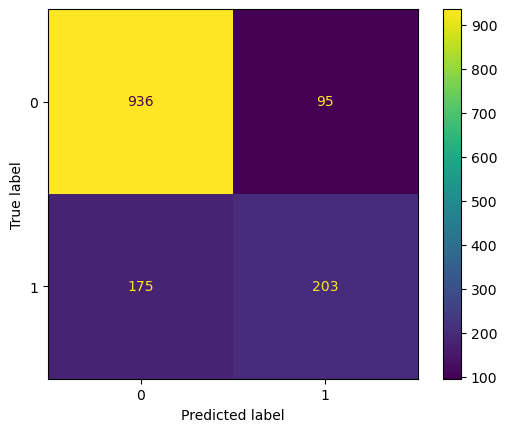

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay= ConfusionMatrixDisplay(cm).plot()